In [1]:
from numbers import Number
from utils import normalize, split_dataset
from data_extractor import Data_extractor_v1
import pandas as pd
import numpy as np

In [2]:

path = "/data/hnl/prompt_tau/anatuple/nanoV10/TEST6/ttm_DeepTau2p5/"
extractor = Data_extractor_v1('ttm')
data = extractor(path)

In [3]:
data.keys()

dict_keys(['event', 'genWeight', 'deltaR_12', 'deltaR_13', 'deltaR_23', 'pt_123', 'mt_12', 'mt_13', 'mt_23', 'Mt_tot', 'n_tauh', 'mass_hyp', 'signal_label', 'channel', 'event_type'])

In [4]:
data_pd = pd.DataFrame(data)
signal = data_pd.loc[data_pd['signal_label']==1]
background = data_pd.loc[data_pd['signal_label']==0]
background_0 = background.loc[background['n_tauh']==0]
background_1 = background.loc[background['n_tauh']==1]
background_2 = background.loc[background['n_tauh']==2]

In [15]:
# variables_label = [r"$\Delta R_{\mu\tau_1}$", r"$\Delta R_{\mu\tau_2}$", r"$\sum_{i\in \{\mu,\tau_1,\tau_2\}}\vec{p}_{T}^{i}$", r"$m_{T}^{\tau\tau}$", r"$M_{T}^{total}$"]
input_vars = ['deltaR_12', 'deltaR_13', 'deltaR_23', 'pt_123', 'mt_12', 'mt_13', 'mt_23', 'Mt_tot', 'n_tauh', 'signal_label', 'mass_hyp']
variables_label = [r"$\Delta R_{\tau_1\tau_2}$", r"$\Delta R_{\tau_1\mu}$", r"$\Delta R_{\tau_2\mu}$", r"$p_{T}^{\sum_{\mu\tau\tau}}$", r"$m_{T}^{\tau\tau}$", r"$m_{T}^{\tau_1\mu}$", r"$m_{T}^{\tau_2\mu}$", r"$M_{T}^{total}$"]
bin_edges = [np.linspace(0,5,20)]



In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({"font.size": 16, "font.family": "serif"})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

/tmp/glardon/ipykernel_39900/2353966564.py:34: RuntimeWarning: invalid value encountered in sqrt
  err_bkg_2 = counts_bkg_2**0.5


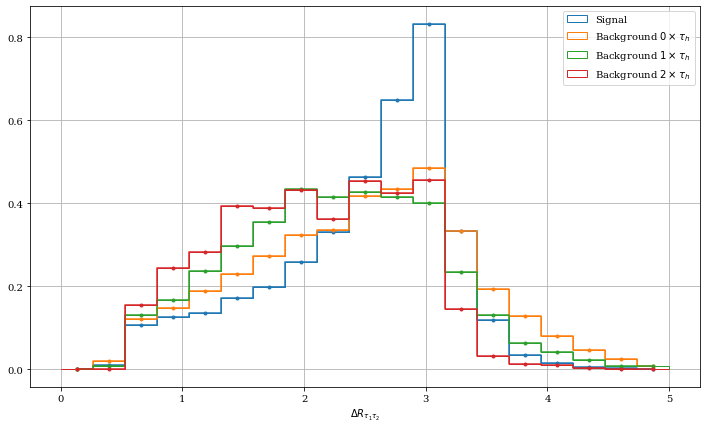

In [16]:
i = 0
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
normalize = True
# normalize = False
# span = None
span = (0.,400.)

n_bins = 25
histtype = 'step'


counts_s, bin_edges_s, _ = ax.hist(signal[input_vars[i]], weights = signal['genWeight'], bins=bin_edges[0], label=r"Signal", stacked=True,
                                   range=span, histtype=histtype, density=normalize, color=colors[0])
counts_bkg_0, bin_edges_bkg_0, _ = ax.hist(background_0[input_vars[i]], weights = background_0['genWeight'], bins=bin_edges[0], range=span,
                                           label=r"Background $0\times\tau_h$", stacked=True, histtype=histtype, density=normalize, color=colors[1])
counts_bkg_1, bin_edges_bkg_1, _ = ax.hist(background_1[input_vars[i]], weights = background_1['genWeight'], bins=bin_edges[0], range=span,
                                           label=r"Background $1\times\tau_h$", stacked=True, histtype=histtype, density=normalize, color=colors[2])
counts_bkg_2, bin_edges_bkg_2, _ = ax.hist(background_2[input_vars[i]], weights = background_2['genWeight'], bins=bin_edges[0], range=span ,
                                           label=r"Background $2\times\tau_h$", stacked=True, histtype=histtype, density=normalize, color=colors[3])

bin_centers_s = (np.array(bin_edges_s[1:])+np.array(bin_edges_s[:-1]))*0.5
bin_centers_bkg_0 = (np.array(bin_edges_bkg_0[1:])+np.array(bin_edges_bkg_0[:-1]))*0.5
bin_centers_bkg_1 = (np.array(bin_edges_bkg_1[1:])+np.array(bin_edges_bkg_1[:-1]))*0.5
bin_centers_bkg_2 = (np.array(bin_edges_bkg_2[1:])+np.array(bin_edges_bkg_2[:-1]))*0.5

counts_s = np.array(counts_s)
counts_bkg_0 = np.array(counts_bkg_0)
counts_bkg_1 = np.array(counts_bkg_1)
counts_bkg_2 = np.array(counts_bkg_2)

err_s = counts_s**0.5
err_bkg_0 = counts_bkg_0**0.5
err_bkg_1 = counts_bkg_1**0.5
err_bkg_2 = counts_bkg_2**0.5
if normalize:
    err_s /= len(signal[input_vars[i]])
    err_bkg_0 /= len(background_0[input_vars[i]])
    err_bkg_1 /= len(background_1[input_vars[i]])
    err_bkg_2 /= len(background_2[input_vars[i]])

Delta = bin_edges_s[1]-bin_edges_s[0]
ax.set_xlabel(variables_label[i])
# ax.set_ylabel(f"Events")
# plt.yscale('log')
ax.legend()
ax.grid()


ax.errorbar(bin_centers_s, counts_s, yerr = err_s, marker = '.',drawstyle = 'steps-mid', color=colors[0])
ax.errorbar(bin_centers_bkg_0, counts_bkg_0, yerr = err_bkg_0, marker = '.',drawstyle = 'steps-mid', color=colors[1])
ax.errorbar(bin_centers_bkg_1, counts_bkg_1, yerr = err_bkg_1, marker = '.',drawstyle = 'steps-mid', color=colors[2])
ax.errorbar(bin_centers_bkg_2, counts_bkg_2, yerr = err_bkg_2, marker = '.',drawstyle = 'steps-mid', color=colors[3])

plt.show()
i += 1

In [ ]:
def plot_hist(dataframe, keys, keys_label, bins_list, normalize = True, mode='n_tauh'):
    sub_df = {}
    if mode == 'n_tauh':
        signal = data_pd.loc[data_pd['signal_label']==1]
        background = data_pd.loc[data_pd['signal_label']==0]
        background_0 = background.loc[background['n_tauh']==0]
        background_1 = background.loc[background['n_tauh']==1]
        background_2 = background.loc[background['n_tauh']==2]
        sub_df["signal"] = signal
        sub_df["$background 0\time\tau_h$"] = background_0
        sub_df["$background 1\time\tau_h$"] = background_1
        sub_df["$background 2\time\tau_h$"] = background_2
    else:
        raise ValueError("The mode {mode} is not valid")
    
    for i,key in enumerate(keys):
        fig, ax = plt.subplots(1, 1, figsize=(12, 7))
        counts = []
        errors = []
        for event_type in sub_df:
            df = sub_df['event_type']
            c,b = np.histogram(df[key], bins=bins_list[i], weights=df['genWeight'])
            c2,_ = np.histogram(df[key], bins=bins_list[i], weights=df['genWeight']**2)
            counts.append(c)
            errors.append(np.sqrt(c2))
        
        
        

In [11]:
i=0
weights = signal['genWeight']
counts_s = np.histogram(signal[input_vars[i]], bins=bin_edges[i], weights = weights)
h2,_ = np.histogram(signal[input_vars[i]], bins=bin_edges[i], weights = weights**2)
error = np.sqrt(h2)

In [23]:
dictionary ={'a':[1,2,3,4], 'b':[2,3,4,5], 'c':[3,4,5,6]}
df = pd.DataFrame(dictionary)
for row in df.iterrows():
    print(row.item)

AttributeError: 'tuple' object has no attribute 'item'